# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [83]:
from __future__ import absolute_import, division, print_function

In [84]:
import tensorflow as tf
import numpy as np
import datetime
rng = np.random
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = '/root/tfLogs/' + current_time
summary_writer = tf.summary.create_file_writer(log_dir)

In [85]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [86]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [87]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [88]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [89]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        with summary_writer.as_default():
            print("step: %i, loss: %f" % (step, loss))
            tf.summary.scalar("epoch_loss", loss,step)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.347588
step: 50, loss: 0.347588, W: 0.428086, b: -0.452155
step: 100, loss: 0.305786
step: 100, loss: 0.305786, W: 0.407893, b: -0.309001
step: 150, loss: 0.273003
step: 150, loss: 0.273003, W: 0.390012, b: -0.182229
step: 200, loss: 0.247294
step: 200, loss: 0.247294, W: 0.374177, b: -0.069964
step: 250, loss: 0.227133
step: 250, loss: 0.227133, W: 0.360153, b: 0.029454
step: 300, loss: 0.211322
step: 300, loss: 0.211322, W: 0.347735, b: 0.117495
step: 350, loss: 0.198922
step: 350, loss: 0.198922, W: 0.336738, b: 0.195461
step: 400, loss: 0.189199
step: 400, loss: 0.189199, W: 0.326999, b: 0.264505
step: 450, loss: 0.181573
step: 450, loss: 0.181573, W: 0.318375, b: 0.325648
step: 500, loss: 0.175593
step: 500, loss: 0.175593, W: 0.310737, b: 0.379793
step: 550, loss: 0.170903
step: 550, loss: 0.170903, W: 0.303974, b: 0.427743
step: 600, loss: 0.167225
step: 600, loss: 0.167225, W: 0.297984, b: 0.470205
step: 650, loss: 0.164340
step: 650, loss: 0.164340, W: 0.2926

In [90]:
import matplotlib.pyplot as plt

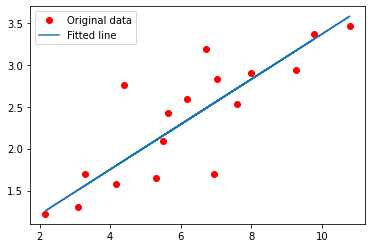

In [91]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()